# # 📊 Battery Capacity Data Exploration
# 
# This notebook loads the raw battery dataset, explores its structure, 
# and performs basic feature engineering for impedance data.

# 

In [1]:
import sys
import os 
from pathlib import Path

BASE_DIR = os.getcwd()
sys.path.append(str(Path(BASE_DIR).resolve().parents[0]))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [2]:
from src.data.data_loader import load_raw_data, explore_data
from src.data.feature_engineer import process_impedance_features
from src.data.data_preprocess import classify_capacity_bins
from src.config.load_config import load_config

In [3]:
config = load_config(str(Path(BASE_DIR).resolve().parents[0]/"configs"/"config.yaml"))

csv_file_path = config['paths']['dataset']

In [4]:
data = load_raw_data(str(csv_file_path))

In [5]:
# Explore dataset
summary_stats = explore_data(data)
display(summary_stats)

=== DATASET OVERVIEW ===
Dataset shape: (467, 140)
Number of battery cells: 467
Number of features: 140

=== CAPACITY STATISTICS ===
Mean capacity: 8982.48 mAh
Std deviation: 775.91 mAh
Min capacity: 6522.40 mAh
Max capacity: 10027.02 mAh

=== DATA QUALITY ===
Total missing values: 0


,Cell ID,Capacity (mAh),Zreal_3.2e+04Hz,Zreal_2.5e+04Hz,Zreal_2e+04Hz,Zreal_1.6e+04Hz,Zreal_1.3e+04Hz,Zreal_1e+04Hz,Zreal_7.9e+03Hz,Zreal_6.3e+03Hz,...,Zimag_0.04Hz,Zimag_0.032Hz,Zimag_0.025Hz,Zimag_0.02Hz,Zimag_0.016Hz,Zimag_0.013Hz,Zimag_0.01Hz,Zimag_0.0079Hz,Zimag_0.0063Hz,Zimag_0.005Hz
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,234.000000,8982.477236,0.001620,0.001577,0.001488,0.001399,0.001309,0.001222,0.001137,0.001066,...,-0.000341,-0.000378,-0.000425,-0.000483,-0.000554,-0.000642,-0.000747,-0.000874,-0.001017,-0.001176
std,134.955548,775.912444,0.000502,0.000355,0.000263,0.000217,0.000189,0.000181,0.000159,0.000149,...,0.000297,0.000287,0.000276,0.000270,0.000269,0.000275,0.000292,0.000320,0.000360,0.000411
min,1.000000,6522.400210,0.000571,0.000706,0.000803,0.000802,0.000847,0.000741,0.000754,0.000694,...,-0.003286,-0.003250,-0.003092,-0.002979,-0.002835,-0.002835,-0.003115,-0.003418,-0.003838,-0.004367
25%,117.500000,8478.284160,0.001315,0.001371,0.001325,0.001259,0.001182,0.001105,0.001029,0.000952,...,-0.000383,-0.000431,-0.000489,-0.000559,-0.000646,-0.000754,-0.000890,-0.001048,-0.001233,-0.001450
50%,234.000000,9107.242400,0.001466,0.001470,0.001429,0.001378,0.001281,0.001220,0.001126,0.001057,...,-0.000268,-0.000310,-0.000363,-0.000429,-0.000507,-0.000603,-0.000717,-0.000839,-0.000989,-0.001157
75%,350.500000,9538.128040,0.001778,0.001734,0.001649,0.001525,0.001414,0.001311,0.001222,0.001151,...,-0.000209,-0.000242,-0.000283,-0.000333,-0.000389,-0.000457,-0.000535,-0.000623,-0.000718,-0.000817
max,467.000000,10027.015440,0.003104,0.002542,0.002453,0.002368,0.002206,0.002066,0.001898,0.001737,...,-0.000163,-0.000196,-0.000231,-0.000265,-0.000309,-0.000370,-0.000440,-0.000510,-0.000591,-0.000669


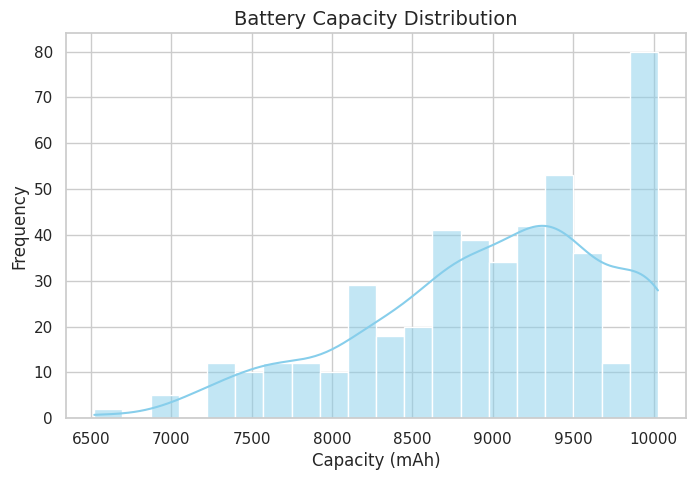

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Capacity (mAh)"], kde=True, bins=20, color="skyblue")
plt.title("Battery Capacity Distribution", fontsize=14)
plt.xlabel("Capacity (mAh)")
plt.ylabel("Frequency")
plt.show()

In [7]:
features = process_impedance_features(data)
display(features.head())

,Cell ID,Capacity (mAh),Zreal_mean,Zreal_std,Zreal_min,Zreal_max,Zreal_range,Zimag_mean,Zimag_std,Zimag_min,Zimag_max,Zimag_range,Impedance_ratio,Total_impedance
0,1,10000.00000,0.003442,0.002291,0.000905,0.006818,0.005913,0.000368,0.002909,-0.001721,0.013767,0.015488,9.351095,0.003461
1,2,9170.36275,0.002704,0.001477,0.000923,0.004933,0.004011,0.000985,0.003936,-0.001457,0.019819,0.021276,2.746577,0.002878
2,3,8982.88016,0.002599,0.001311,0.000954,0.004632,0.003678,0.000862,0.003483,-0.001417,0.017347,0.018764,3.015128,0.002738
3,4,8813.39590,0.002594,0.001308,0.000995,0.004613,0.003618,0.000487,0.002514,-0.001389,0.012269,0.013658,5.330535,0.002639
4,5,8636.62660,0.002713,0.001357,0.001062,0.004835,0.003773,0.000444,0.002430,-0.001398,0.011761,0.013159,6.105283,0.002749


In [8]:
processed_features = classify_capacity_bins(features)
display(processed_features["Bin"].value_counts().sort_index())


=== CAPACITY CLASSIFICATION ===
    Capacity (mAh)                                    
             count     mean     std      min       max
Bin                                                   
1                2  6522.40    0.00  6522.40   6522.40
2               17  7220.91  123.51  7040.00   7367.71
3               40  7702.60  148.02  7484.09   7946.64
4               59  8285.36  132.28  8095.92   8478.28
5              349  9346.92  458.10  8508.94  10027.02


Bin
1      2
2     17
3     40
4     59
5    349
Name: count, dtype: int64

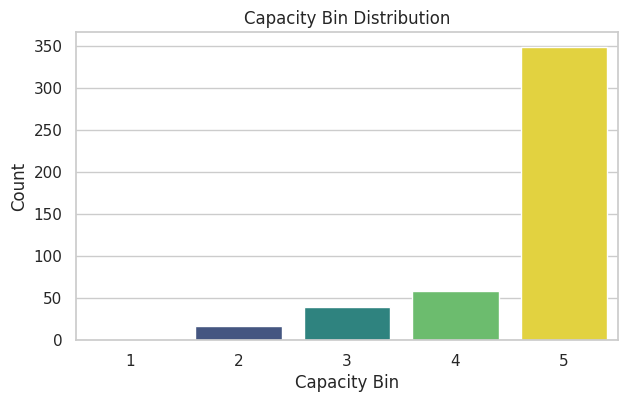

In [12]:
plt.figure(figsize=(7, 4))
sns.countplot(x="Bin", data=processed_features, hue="Bin", palette="viridis", legend=False)
plt.title("Capacity Bin Distribution")
plt.xlabel("Capacity Bin")
plt.ylabel("Count")
plt.show()